In [222]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier

Import the data

In [223]:
df = pd.read_csv("./tarvel+review+ratings.zip")
df.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


Data Pre-Processing

First we rename the columns for better understanding of the data 

In [224]:
category_names = {
    "Category 1": "Art_galleries",
    "Category 2": "Dance_clubs",
    "Category 3": "Juice_bars",
    "Category 4": "Restaurants",
    "Category 5": "Museums",
    "Category 6": "Resorts",
    "Category 7": "Parks",
    "Category 8": "Beaches",
    "Category 9": "Theaters",
    "Category 10": "Religious_institutions",
    "Category 11": "Entertainment",
    "Category 12": "Value_for_Money",
    "Category 13": "Service",
    "Category 14": "Staff_Friendliness",
    "Category 15": "Language_Accessibility",
    "Category 16": "Internet",
    "Category 17": "Information",
    "Category 18": "City_Cleanliness",
    "Category 19": "Environment",
    "Category 20": "Crowd_Management",
    "Category 21": "Weather",
    "Category 22": "Navigation",
    "Category 23": "Convenience",
    "Category 24": "Overall_Travel_Satisfaction"
}
df = df.rename(columns=category_names)
df.head()


,User,Art_galleries,Dance_clubs,Juice_bars,Restaurants,Museums,Resorts,Parks,Beaches,Theaters,...,Internet,Information,City_Cleanliness,Environment,Crowd_Management,Weather,Navigation,Convenience,Overall_Travel_Satisfaction,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


Then we drop the columns that are irrelevant. In this case,category 25 will be dropped .

In [225]:
df = df.drop(columns=["Unnamed: 25"])
df.head()

,User,Art_galleries,Dance_clubs,Juice_bars,Restaurants,Museums,Resorts,Parks,Beaches,Theaters,...,Language_Accessibility,Internet,Information,City_Cleanliness,Environment,Crowd_Management,Weather,Navigation,Convenience,Overall_Travel_Satisfaction
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


Check for missing values

In [226]:
df.isna().sum()


User                           0
Art_galleries                  0
Dance_clubs                    0
Juice_bars                     0
Restaurants                    0
Museums                        0
Resorts                        0
Parks                          0
Beaches                        0
Theaters                       0
Religious_institutions         0
Entertainment                  0
Value_for_Money                1
Service                        0
Staff_Friendliness             0
Language_Accessibility         0
Internet                       0
Information                    0
City_Cleanliness               0
Environment                    0
Crowd_Management               0
Weather                        0
Navigation                     0
Convenience                    0
Overall_Travel_Satisfaction    1
dtype: int64

In [227]:
df.fillna(df.mean(numeric_only=True), inplace=True)


In [228]:
df.isna().sum()

User                           0
Art_galleries                  0
Dance_clubs                    0
Juice_bars                     0
Restaurants                    0
Museums                        0
Resorts                        0
Parks                          0
Beaches                        0
Theaters                       0
Religious_institutions         0
Entertainment                  0
Value_for_Money                0
Service                        0
Staff_Friendliness             0
Language_Accessibility         0
Internet                       0
Information                    0
City_Cleanliness               0
Environment                    0
Crowd_Management               0
Weather                        0
Navigation                     0
Convenience                    0
Overall_Travel_Satisfaction    0
dtype: int64

In [229]:
df["Satisfaction"] = df["Overall_Travel_Satisfaction"].apply(
    lambda x: 1 if x >= 4 else 0
)


In [230]:
X = df.drop(columns=["User", "Overall_Travel_Satisfaction", "Satisfaction"])
y = df["Satisfaction"]

In [231]:
X = X.apply(pd.to_numeric, errors="coerce")


Perform a Train-Test split 

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [233]:
X_train.isna().sum()


Art_galleries             0
Dance_clubs               0
Juice_bars                0
Restaurants               0
Museums                   0
Resorts                   0
Parks                     0
Beaches                   0
Theaters                  0
Religious_institutions    0
Entertainment             1
Value_for_Money           0
Service                   0
Staff_Friendliness        0
Language_Accessibility    0
Internet                  0
Information               0
City_Cleanliness          0
Environment               0
Crowd_Management          0
Weather                   0
Navigation                0
Convenience               0
dtype: int64

In [234]:
X_test.isna().sum()

Art_galleries             0
Dance_clubs               0
Juice_bars                0
Restaurants               0
Museums                   0
Resorts                   0
Parks                     0
Beaches                   0
Theaters                  0
Religious_institutions    0
Entertainment             0
Value_for_Money           0
Service                   0
Staff_Friendliness        0
Language_Accessibility    0
Internet                  0
Information               0
City_Cleanliness          0
Environment               0
Crowd_Management          0
Weather                   0
Navigation                0
Convenience               0
dtype: int64

In [235]:
X_train = X_train.fillna(X_train.mean())

Scaling the data

In [236]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [237]:
y.value_counts(normalize=True)


Satisfaction
0    0.918255
1    0.081745
Name: proportion, dtype: float64

Modelling

Create a Logistic Regression model

In [238]:
log_reg = LogisticRegression(max_iter=1000,random_state=42)
log_reg.fit(X_train_scaled,y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [239]:
y_train_pred = log_reg.predict(X_train_scaled)
y_test_pred = log_reg.predict(X_test_scaled)



In [240]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test,y_test_pred)
recall = recall_score(y_test,y_test_pred)
f1 = f1_score(y_test,y_test_pred)


In [241]:
print(f"""Logistic Regression results:
      
Train Accuracy: {train_accuracy:.3f}
Test Accuracy:  {test_accuracy:.3f}
Precision: {precision:.3f}
Recall:    {recall:.3f}
F1-score:  {f1:.3f}
""")


Logistic Regression results:
      
Train Accuracy: 0.912
Test Accuracy:  0.906
Precision: 0.214
Recall:    0.032
F1-score:  0.055



Create a Decision Tree Model

In [242]:
dt = DecisionTreeClassifier(criterion='entropy',class_weight='balanced',max_depth=5,random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, random_state=42)

In [243]:
y_train_pred_dt = dt.predict(X_train)
y_test_pred_dt = dt.predict(X_test)
print("Decision tree y_train value =",y_train_pred_dt)
print("Decision tree y_test value =",y_test_pred_dt)

Decision tree y_train value = [0 0 0 ... 0 1 1]
Decision tree y_test value = [0 0 0 ... 0 0 0]


In [244]:
train_accuracy = accuracy_score(y_train, y_train_pred_dt)
test_accuracy = accuracy_score(y_test, y_test_pred_dt)
precision = precision_score(y_test,y_test_pred_dt)
recall = recall_score(y_test,y_test_pred_dt)
f1 = f1_score(y_test,y_test_pred_dt)

In [245]:
print(f"""Decision Tree results:
      
Train Accuracy: {train_accuracy:.3f}
Test Accuracy:  {test_accuracy:.3f}
Precision: {precision:.3f}
Recall:    {recall:.3f}
F1-score:  {f1:.3f}
""")

Decision Tree results:
      
Train Accuracy: 0.830
Test Accuracy:  0.813
Precision: 0.307
Recall:    0.916
F1-score:  0.460



Evaluation

Logistic Regression and Decision tree models were trained and evaluated. Decision Tree showed a higher recall score and F1-score and was therefore selected for predicting customer satisfaction.

In [246]:
feature_importance = pd.Series(dt.feature_importances_,index=X.columns).sort_values(ascending=False)
print(feature_importance)

Theaters                  0.275612
Language_Accessibility    0.202472
Art_galleries             0.199644
Environment               0.072472
Restaurants               0.067174
Convenience               0.033938
Religious_institutions    0.030778
Crowd_Management          0.029489
Beaches                   0.023126
Weather                   0.014818
Dance_clubs               0.013197
Value_for_Money           0.013054
Staff_Friendliness        0.011957
Service                   0.008058
Information               0.004210
Parks                     0.000000
Resorts                   0.000000
Museums                   0.000000
Juice_bars                0.000000
Entertainment             0.000000
Internet                  0.000000
City_Cleanliness          0.000000
Navigation                0.000000
dtype: float64


The most influential predictors were Theatres and Language Accessiblity, indicating that ratings in these categories play a major role in predicting traveller satisfaction.

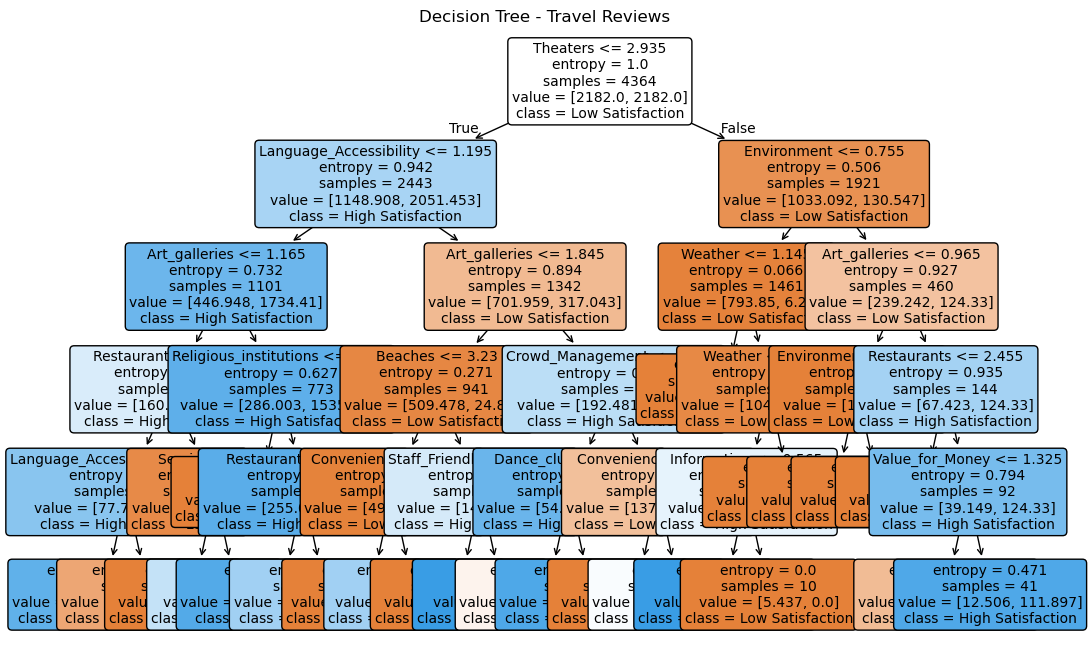

In [247]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
y_pred = dt.predict(X_test)
plt.figure(figsize=(12,8)) 
plot_tree(dt,
    feature_names=X.columns,
    class_names=['Low Satisfaction','High Satisfaction'],
    filled=True,
    rounded=True,
    fontsize=10  
)
plt.title("Decision Tree - Travel Reviews ")
plt.show()

The decision tree reveals how predictor variables interact to determine customer satisfaction.Reviews equal to 2 represents high satisfaction while  reviews below 1 represent low satisfaction.Theatres is the most important predictor and influenced the best reviews. Other factors that influenced best reviews include Language accessibility and art galleries. Environment,weather and beaches got low reviews thus low satisfaction from the clients.The decision tree is interpretable and allows the business to understand why a customer is predicted to be satisfied or not. 